In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('C:\\Users\\LOQ\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [ ]:
print(df.head())
print(df.info())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
print(f'Number of duplicated data: {df.duplicated().sum()}')
print(f'Missing values by column:\n{df.isnull().sum()}')

Number of duplicated data: 0
Missing values by column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany 

In [ ]:
print(f'Dataset shape: {df.shape}')
print(df.describe())


Dataset shape: (1470, 35)
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std    

In [16]:
attrition_rate = df['Attrition'].value_counts(normalize=True)
print(f'Attrition Rate:\n{attrition_rate * 100}%')


Attrition Rate:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64%


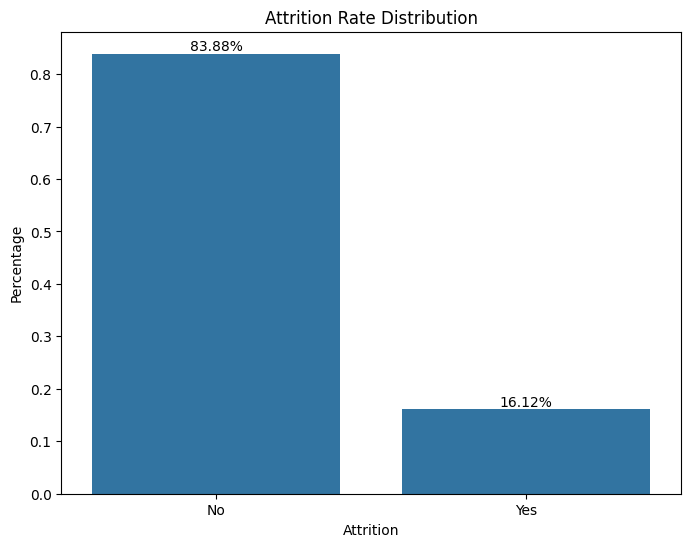

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=attrition_rate.index, y=attrition_rate.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Attrition Rate Distribution')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.show()

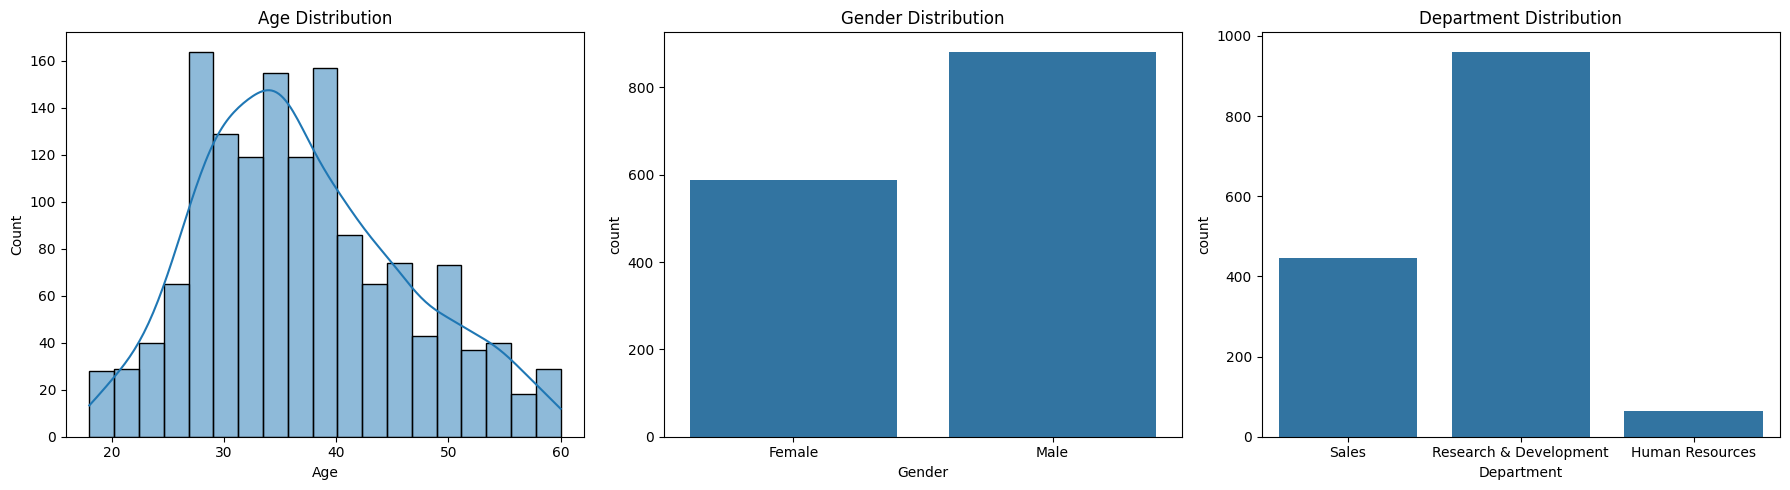

In [8]:
# 5. Exploring Demographic Factors - Age, Gender, Department Distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=df, x='Age', kde=True, ax=axes[0]).set(title='Age Distribution')
sns.countplot(data=df, x='Gender', ax=axes[1]).set(title='Gender Distribution')
sns.countplot(data=df, x='Department', ax=axes[2]).set(title='Department Distribution')
plt.tight_layout()
plt.show()


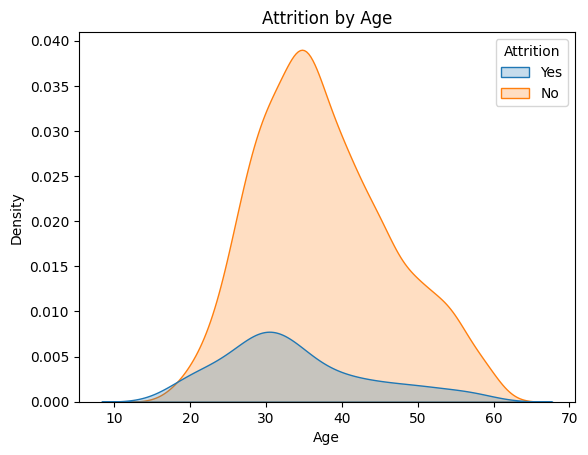

In [ ]:
df_attrition = df[df['Attrition'] == 'Yes']  
sns.kdeplot(data=df, x='Age', hue='Attrition', fill=True)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


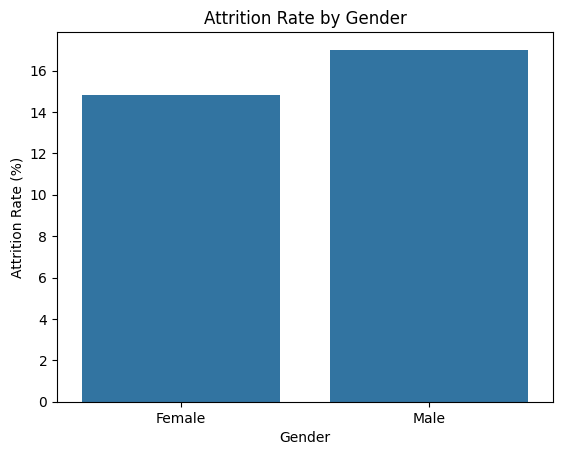

In [ ]:
# Attrition Rate by Gender
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

attrition_rate_gender = calculate_attrition_rate(df, 'Gender')
sns.barplot(data=attrition_rate_gender, x='Gender', y='AttritionRate')
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate (%)')
plt.show()

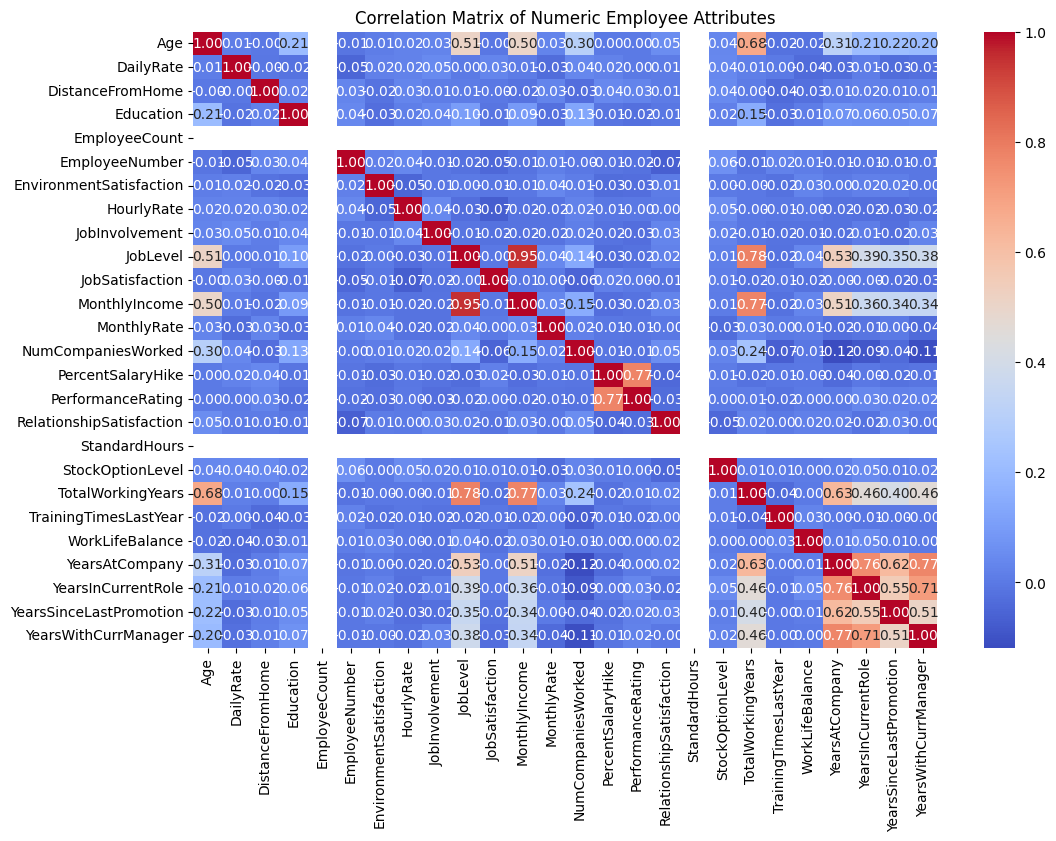

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])  
correlation = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Employee Attributes')
plt.show()


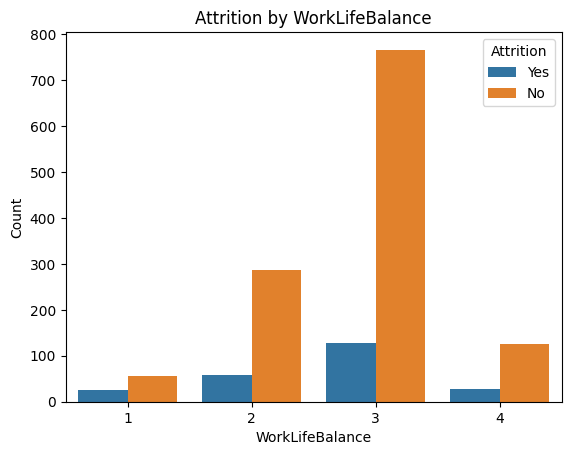

In [ ]:
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition by WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Count')
plt.show()

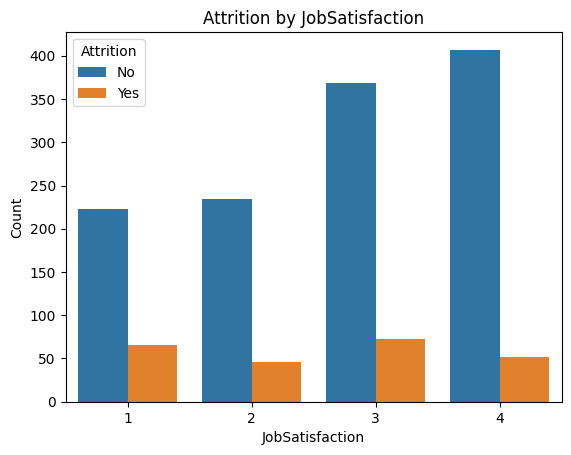

In [14]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Attrition by JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Count')
plt.show()


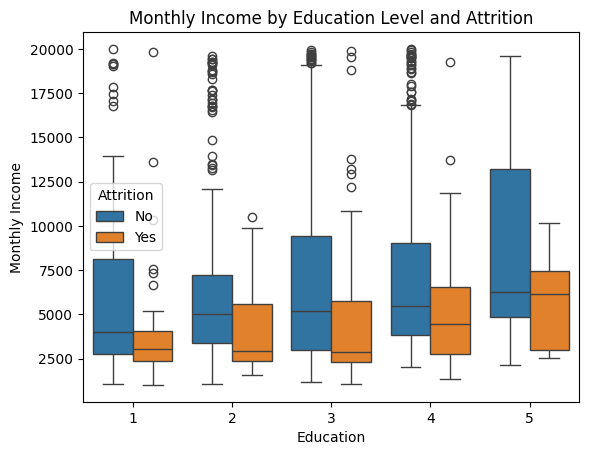

In [ ]:
sns.boxplot(data=df, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title('Monthly Income by Education Level and Attrition')
plt.xlabel('Education')
plt.ylabel('Monthly Income')
plt.show()
